# 911 Calls Capstone Project

For this capstone project I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

I will demonstrate the following:
- Loading the dataset
- Pivot table
- Simple graphs
- Percent change
- Seaborn heatmap

## Loading Data

Importing visualization libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Investigating Data

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv("911.csv")

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
#Title is the category of the call 
df['title'].value_counts()
#Output shows what the call emergency is about

Traffic: VEHICLE ACCIDENT -             23066
Traffic: DISABLED VEHICLE -              7702
Fire: FIRE ALARM                         5496
EMS: RESPIRATORY EMERGENCY               5112
EMS: CARDIAC EMERGENCY                   5012
EMS: FALL VICTIM                         4863
EMS: VEHICLE ACCIDENT                    3935
Traffic: ROAD OBSTRUCTION -              3144
EMS: SUBJECT IN PAIN                     2687
EMS: HEAD INJURY                         2631
EMS: UNKNOWN MEDICAL EMERGENCY           1873
EMS: SYNCOPAL EPISODE                    1717
Fire: VEHICLE ACCIDENT                   1638
EMS: SEIZURES                            1630
EMS: GENERAL WEAKNESS                    1464
Fire: FIRE INVESTIGATION                 1460
EMS: ABDOMINAL PAINS                     1436
EMS: ALTERED MENTAL STATUS               1386
EMS: MEDICAL ALERT ALARM                 1342
EMS: HEMORRHAGING                        1259
EMS: CVA/STROKE                          1202
EMS: OVERDOSE                     

**Checking the top 5 zipcodes that has the most 911 calls**

In [7]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [9]:
df['title'].nunique()
#110 unique titles

110

## Creating new features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. I used the **_.apply()_** function with a custom lambda expression to create a new column called "Reason" that contains this string value.

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [10]:
df['Reasons'] = df['title'].apply(lambda x:x.split(':')[0])
df['Reasons'].head(5)

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reasons, dtype: object

**Investigating the most common Reason for a 911 call based off this new feature I've created**

In [11]:
df['Reasons'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

## Working with DateTime Objects

**Looking at the time information; specifically its type. I notice that the date time is a string and I would prefer it to be an object.**

**So, since these timestamps are still strings; I used **_pd.to_datetime_** to convert the column from strings to Datetime objects.**

In [12]:
type(df['timeStamp'].iloc[0])

str

In [13]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

**Thus I can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**Now that the timestamp column are actually DateTime objects, I used .apply() to create 3 new columns called Hour, Month, and Day of Week.**

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

df['Day of Week'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: Day of Week, dtype: int64

**I noticed how the Day of Week is an integer 0-6. Using the .map() with the dictionary to map the actual string names to the day of the week: **

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [17]:
df['Day of Week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day of Week, dtype: object

## Data Visualization and Analysing 

**Used seaborn to create a countplot visualization of 911 calls by Reason.**

As you can see with the graph, EMS is the largest calls that comes through; thus resources can be smartly allocated for EMS in accordance to other categories. 

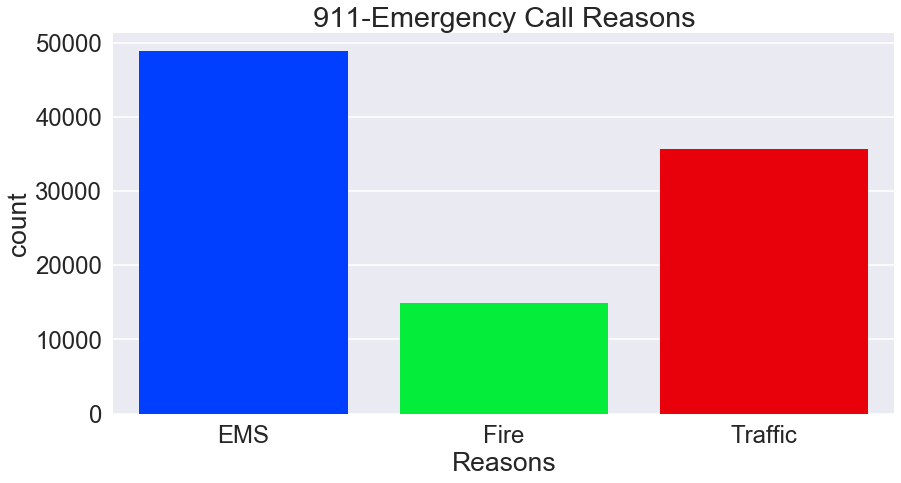

In [18]:
#Boxplot for category of reasons

plt.figure(figsize=(14,7))
#Setting the context to change size of labels, lines etc.
sns.set_context("poster",font_scale=1.5)

sns.set_style('darkgrid')
sns.countplot(x='Reasons',data=df,saturation=1,palette='bright')
plt.title("911-Emergency Call Reasons")
plt.show()

**Investigating the call reasons yearly and how they fluctuate throughout the years.**

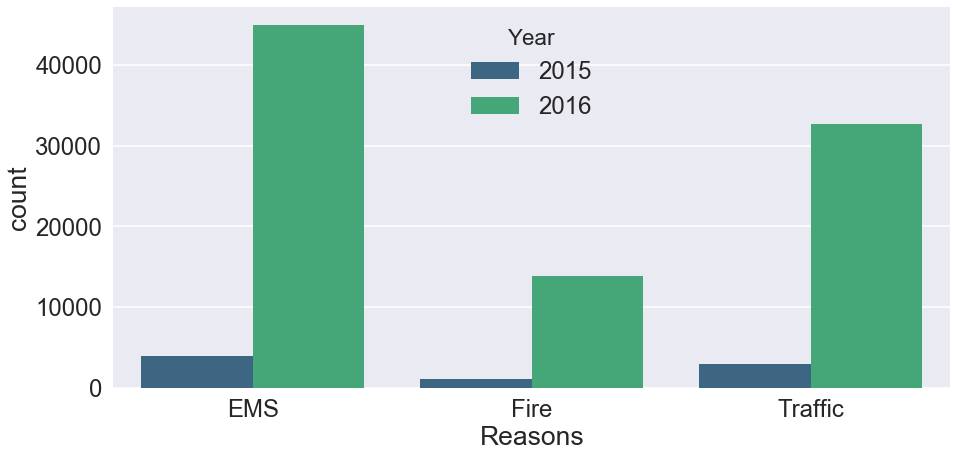

In [19]:
plt.figure(figsize=(15,7))
#Setting context of the visualization
sns.set_context("poster",font_scale=1.5)

#Would like to see how 911 call reasons fluctuate throughout the year
#However, I do not have a column specifically for a year 
df['Year'] = df['timeStamp'].apply(lambda x: x.year)

#Creating the countplot now 
sns.countplot(x='Reasons',hue='Year',data=df,palette='viridis')

**Plot showing monthly 911-emergency calls throughout the year**

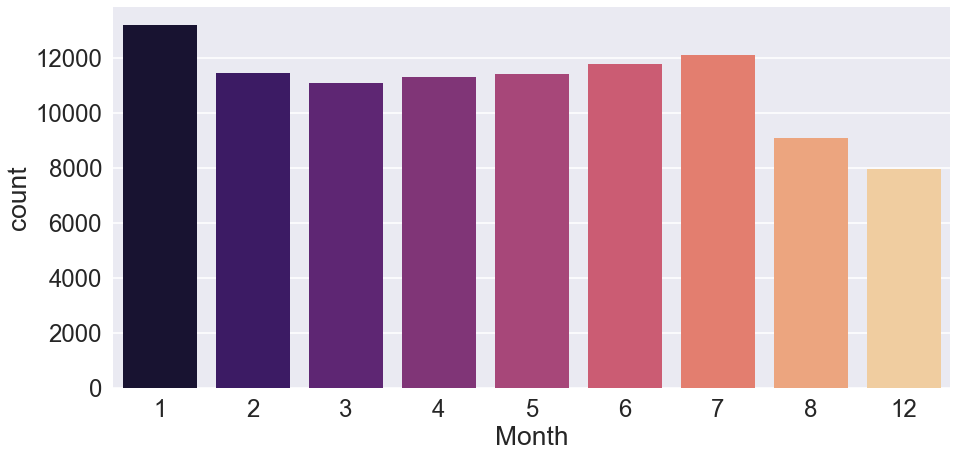

In [20]:
#Setting size of my plot
plt.figure(figsize=(15,7))

#Setting context
sns.set_context("poster",font_scale=1.5)
sns.countplot(x = 'Month',data=df,palette='magma')

**Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

Colour palettes that is really nice to use:
- pal(coolwarm)
- pal(viridis)
- pal(plasma)

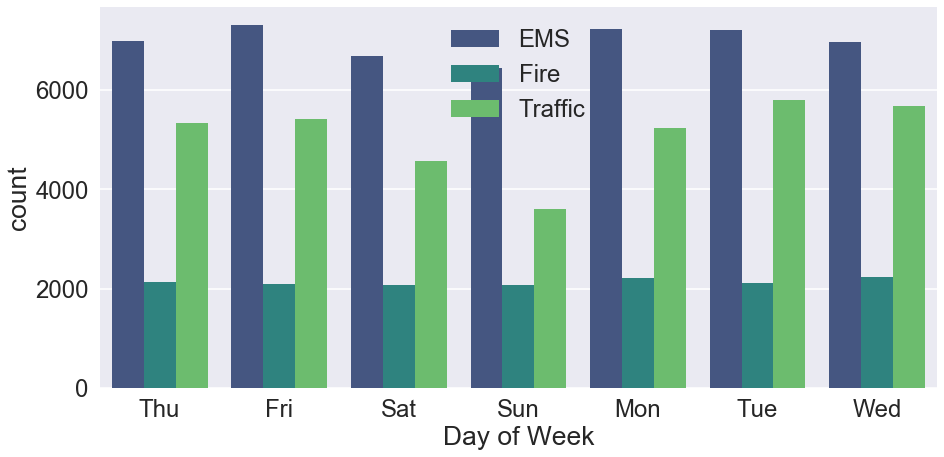

In [21]:
plt.figure(figsize=(15,7))
sns.set_context(context='poster',font_scale=1.5)
sns.countplot(x = 'Day of Week',hue='Reasons',data=df,palette='viridis')
plt.legend(loc=0)

**Now do the same for Month:**

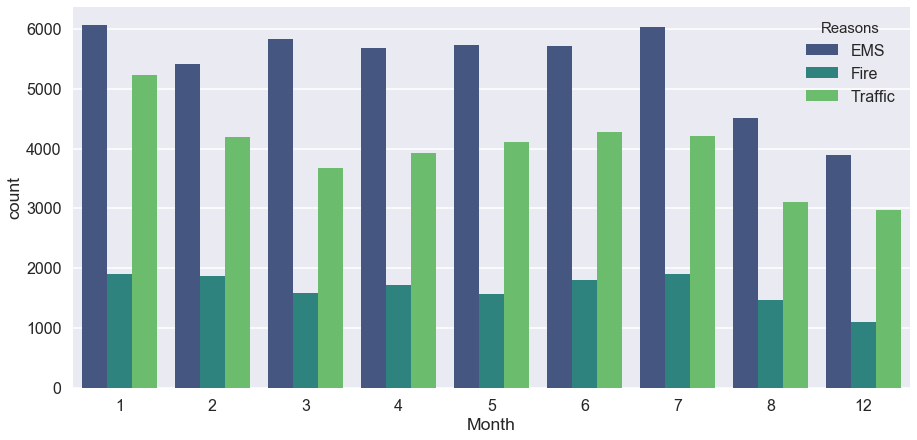

In [22]:
plt.figure(figsize=(15,7))
sns.set_context('poster',font_scale=1)
sns.countplot(x='Month',hue='Reasons',data=df,palette='viridis')

**I have noticed it was missing some Months, let's see if I can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Creating a groupby object called byMonth, where I group the DataFrame by the month column and use the count() method for aggregation.**

In [50]:
byMonth = df.groupby(by='Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week,Year,Date
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

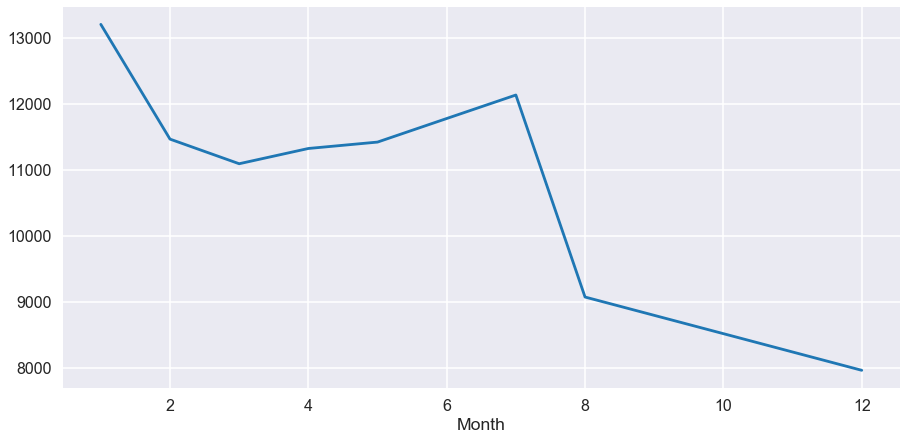

In [51]:
plt.figure(figsize=(15,7))
byMonth['twp'].plot()

**Using seaborn's lmplot() to create a linear fit on the number of calls per month and need to reset the index to a column. **

<Figure size 1080x504 with 0 Axes>

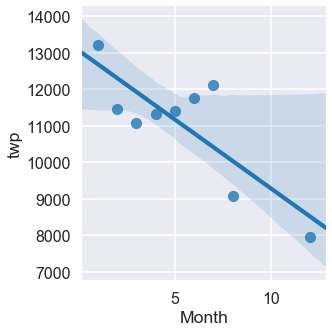

In [52]:
plt.figure(figsize=(15,7))
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column and applied along with the .date() method. ** 

In [26]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

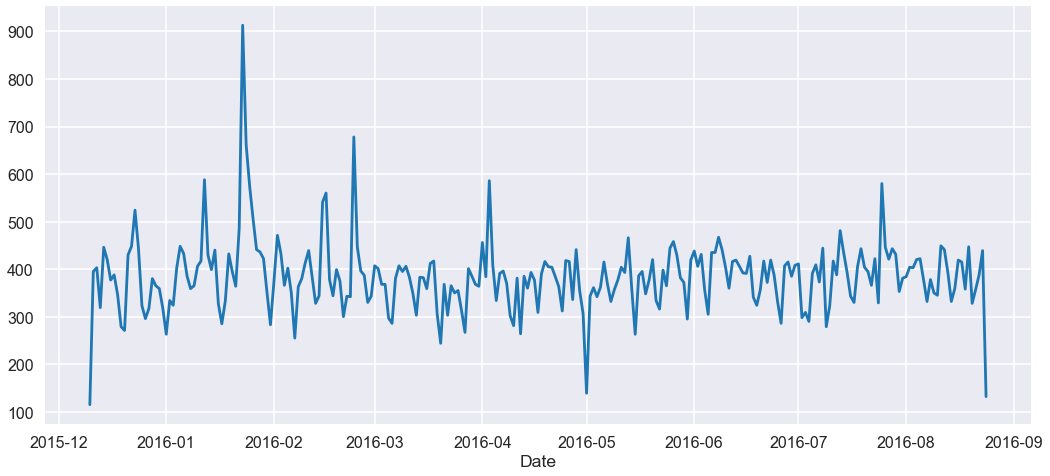

In [53]:
plt.figure(figsize=(15,7))
df.groupby(by='Date').count()['twp'].plot()
plt.tight_layout()

**Recreating this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

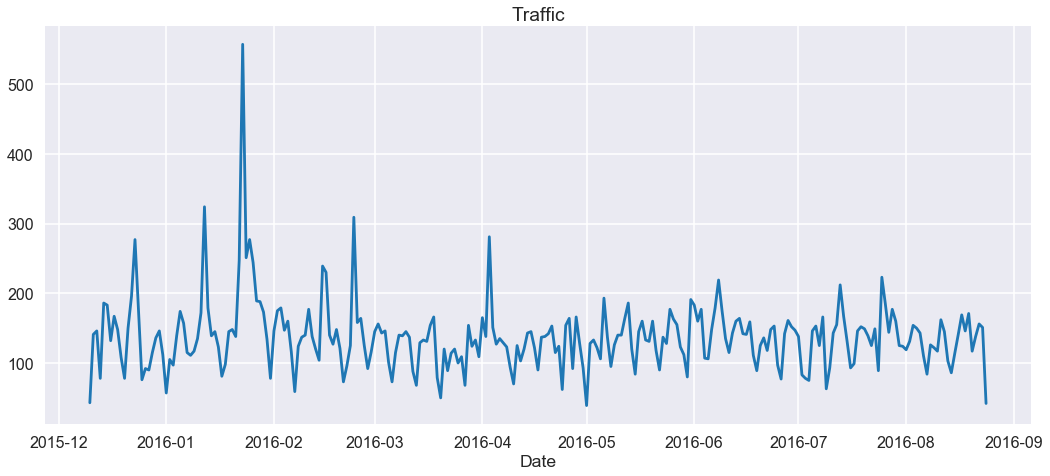

In [55]:
plt.figure(figsize=(15,7))
df[df['Reasons']=='Traffic'].groupby(by='Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

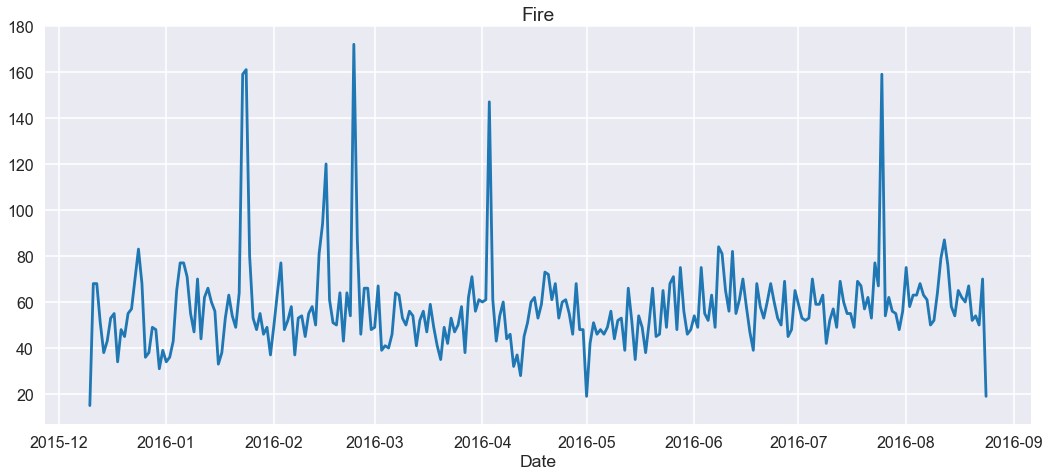

In [56]:
plt.figure(figsize=(15,7))
df[df['Reasons']=='Fire'].groupby(by='Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

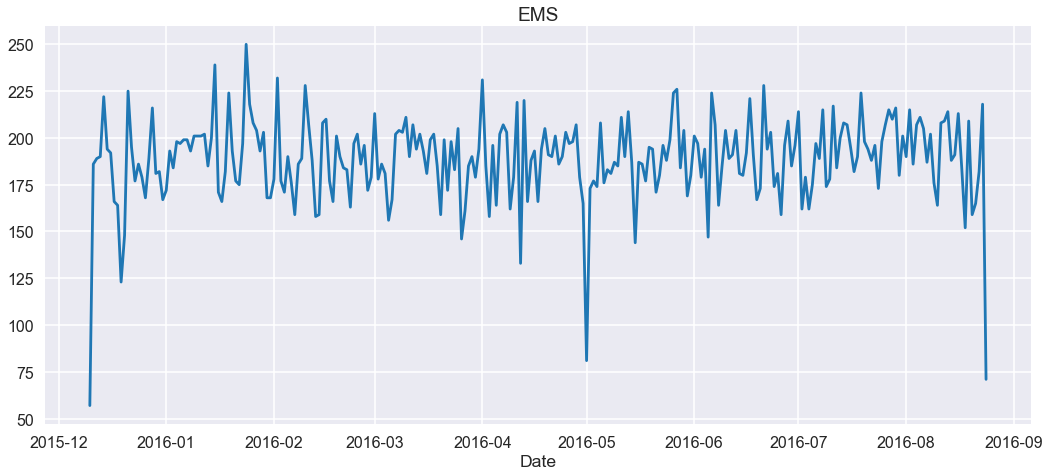

In [58]:
plt.figure(figsize=(15,7))
df[df['Reasons']=='EMS'].groupby(by='Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Creating  heatmaps with seaborn and our data. I'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week i.e. **a matrix**. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.

In [31]:
dayHours = df.groupby(by=['Day of Week','Hour']).count()['Reasons'].unstack()
dayHours.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


## Seaborn Heatmap
**Creating a HeatMap using this new DataFrame. **

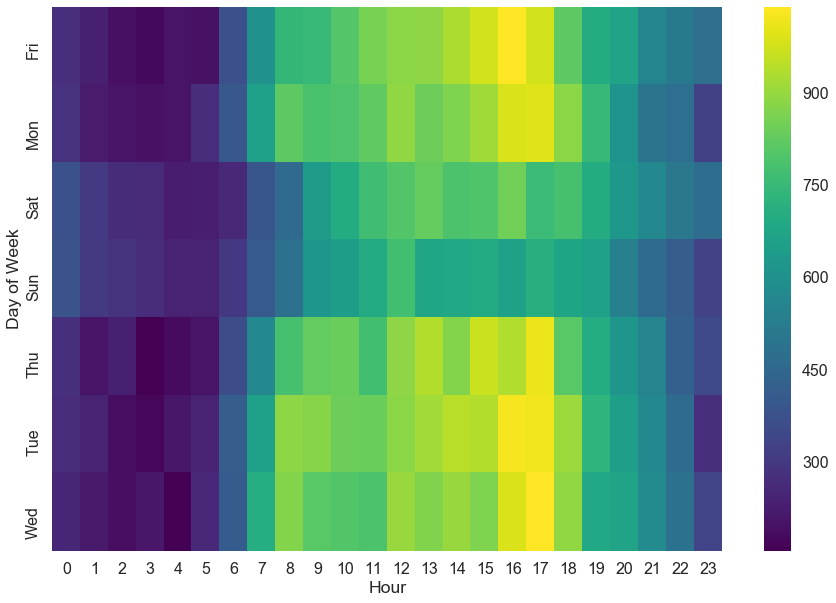

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(dayHours,cmap='viridis')

** Now create a clustermap using this DataFrame. **

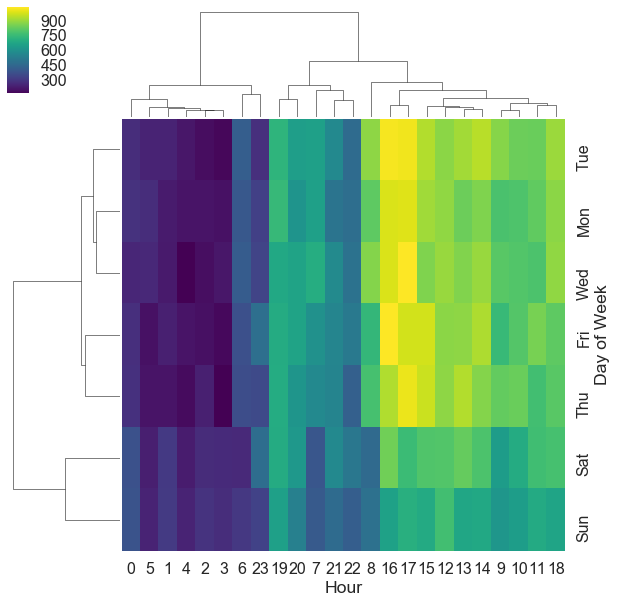

In [33]:
sns.clustermap(data=dayHours,cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [34]:
dayMonth = df.groupby(by=['Month','Day of Week']).count()['Reasons'].unstack()
dayMonth.head()

Day of Week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Month,,,,,,,
1,1970,1727,2291,1960,1584,1973,1700
2,1581,1964,1441,1229,1596,1753,1903
3,1525,1535,1266,1102,1900,1884,1889
4,1958,1598,1734,1488,1601,1430,1517
5,1730,1779,1444,1424,1590,1918,1538


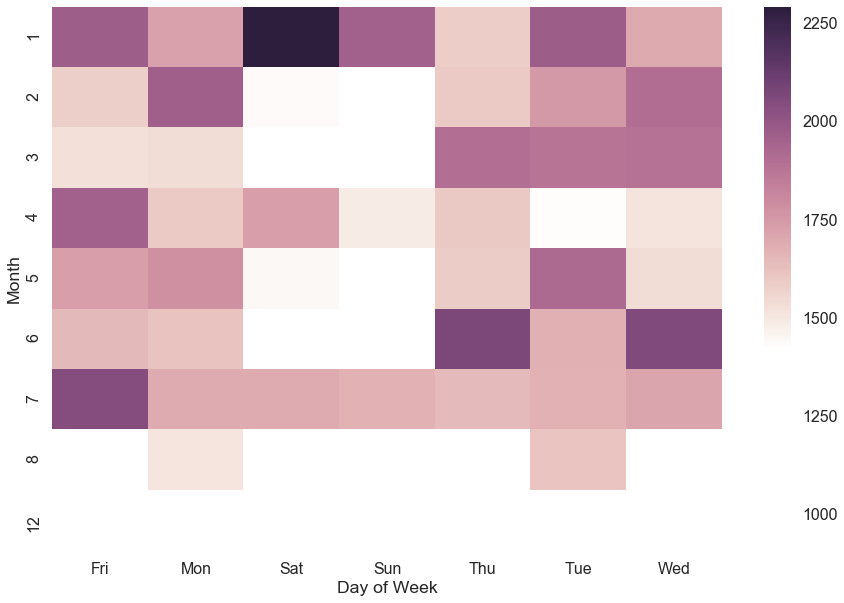

In [35]:
plt.figure(figsize=(15,10))
cmap = sns.cubehelix_palette(light=1.5,as_cmap=True)
sns.heatmap(data=dayMonth,cmap=cmap)

**I want to produce a further heatmap to find some insight into the hour of which traffic accidents most occur throughout the months.**

**With this knowledge, I can delegate my resources (staff) according to the hours that is known for high amounts of traffic accidents for 911 calls.**

In [36]:
#METHOD 1: GROUPBY METHOD
hourMonth = df[df['Reasons'] =='Traffic'].groupby(by=['Month','Hour']).count()['twp'].unstack()
hourMonth.head(5)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
1,93,67,52,51,56,67,172,278,356,280,...,287,305,333,395,339,269,248,218,171,114
2,69,39,27,22,30,61,120,274,223,223,...,257,283,307,310,281,216,192,164,141,102
3,43,40,33,17,18,44,83,207,229,221,...,245,320,339,253,232,155,135,103,95,59
4,53,43,31,30,36,37,109,219,251,217,...,260,330,340,321,230,162,125,99,84,81
5,65,51,33,34,26,46,79,189,252,233,...,253,331,348,370,262,164,148,140,115,69


In [37]:
#METHOD 2: PIVOT METHOD
pivot2 = df[df['Reasons'] == 'Traffic']
pivot2 = pd.pivot_table(data=pivot2,values='e',index='Month',columns='Hour',aggfunc=np.sum)
pivot2.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
1,93,67,52,51,56,67,172,278,356,280,...,287,305,333,395,339,269,248,218,171,114
2,69,39,27,22,30,61,120,274,223,223,...,257,283,307,310,281,216,192,164,141,102
3,43,40,33,17,18,45,83,207,229,221,...,245,320,339,253,232,155,135,103,95,59
4,53,43,31,30,36,37,109,219,251,217,...,260,330,340,321,230,162,125,99,84,81
5,65,51,33,34,26,46,79,189,252,233,...,253,331,348,370,262,164,148,140,115,69


Text(0.5,1,'Vehicle Accidents - All Township')

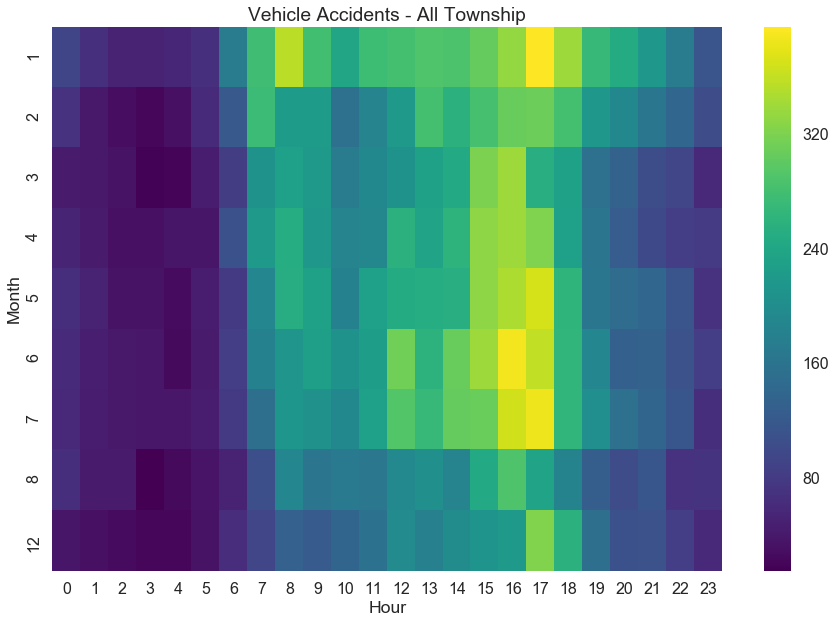

In [38]:
#Heatmap
plt.figure(figsize=(15,10))
axes = sns.heatmap(pivot2,cmap='viridis')
axes.set_title("Vehicle Accidents - All Township")

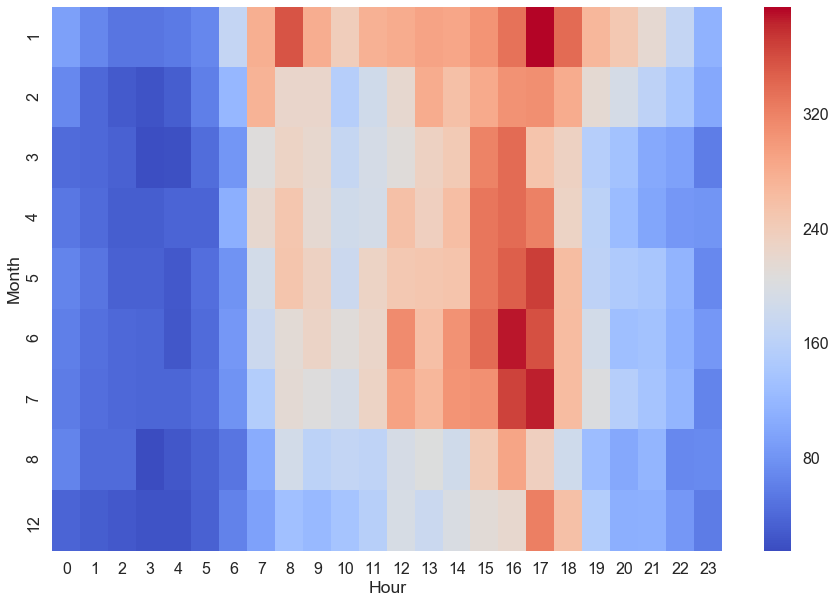

In [39]:
plt.figure(figsize=(15,10))
axes = sns.heatmap(hourMonth,cmap='coolwarm')
#Just doing this to show the same heatmap produced from the 2 methods of matrixes

**BELOW: Heatmap Visualization comparing the number of calls on an hour basis throughout the months to see a trend what _hour_ 911 calls come through the most**

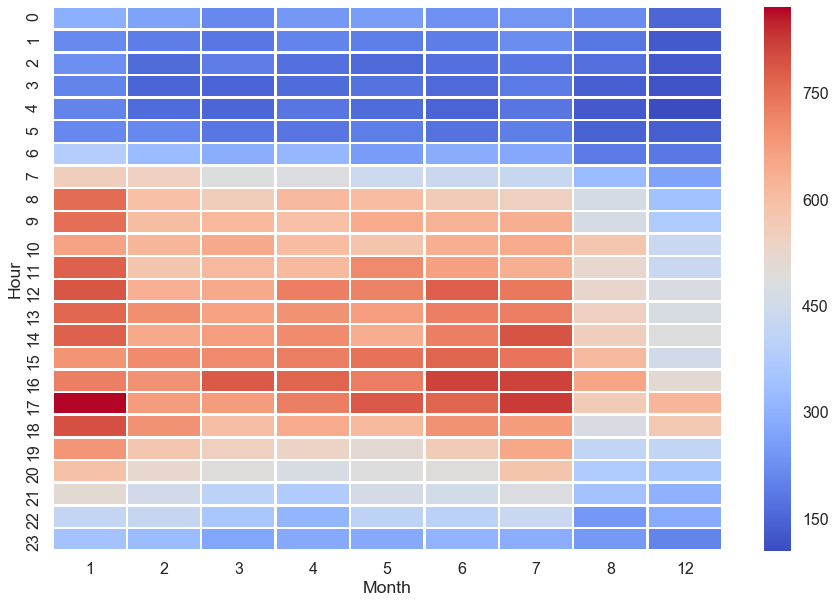

In [40]:
#Creating table with index and columns using the groupby method
monthvhour = df.groupby(by=['Hour','Month']).count()['lat'].unstack()
monthvhour.head()

plt.figure(figsize=(15,10))
sns.heatmap(monthvhour,cmap='coolwarm',lw=1.5)

## Pivot Tables

In [41]:
#Creating a pivot table with just EMS (the majority reason for 911 calls
EMS = df[df['Reasons'] == 'EMS']
EMS.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week,Year,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,Thu,2015,2015-12-10


In [42]:
pivot = pd.pivot_table(data=EMS,values='e',index=['timeStamp'],columns =['title'],aggfunc=np.sum)
pivot.head()

title,EMS: ABDOMINAL PAINS,EMS: ACTIVE SHOOTER,EMS: ALLERGIC REACTION,EMS: ALTERED MENTAL STATUS,EMS: AMPUTATION,EMS: ANIMAL BITE,EMS: APPLIANCE FIRE,EMS: ASSAULT VICTIM,EMS: BACK PAINS/INJURY,EMS: BOMB DEVICE FOUND,...,EMS: TRAIN CRASH,EMS: TRANSFERRED CALL,EMS: UNCONSCIOUS SUBJECT,EMS: UNKNOWN MEDICAL EMERGENCY,EMS: UNKNOWN TYPE FIRE,EMS: UNRESPONSIVE SUBJECT,EMS: VEHICLE ACCIDENT,EMS: VEHICLE FIRE,EMS: WARRANT SERVICE,EMS: WOODS/FIELD FIRE
timeStamp,,,,,,,,,,,,,,,,,,,,,
2015-12-10 17:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-10 17:40:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-10 17:46:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-10 17:47:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2015-12-10 18:06:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#Resampling each week
pt = pivot.resample('W',how=[np.sum]).reset_index()
pt.head()

C:\Users\William X Nguyen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


,timeStamp,EMS: ABDOMINAL PAINS,EMS: ACTIVE SHOOTER,EMS: ALLERGIC REACTION,EMS: ALTERED MENTAL STATUS,EMS: AMPUTATION,EMS: ANIMAL BITE,EMS: APPLIANCE FIRE,EMS: ASSAULT VICTIM,EMS: BACK PAINS/INJURY,...,EMS: TRAIN CRASH,EMS: TRANSFERRED CALL,EMS: UNCONSCIOUS SUBJECT,EMS: UNKNOWN MEDICAL EMERGENCY,EMS: UNKNOWN TYPE FIRE,EMS: UNRESPONSIVE SUBJECT,EMS: VEHICLE ACCIDENT,EMS: VEHICLE FIRE,EMS: WARRANT SERVICE,EMS: WOODS/FIELD FIRE
,,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,2015-12-13,18.0,0.0,8.0,15.0,0.0,0.0,1.0,11.0,7.0,...,0.0,0.0,18.0,24.0,0.0,17.0,48.0,0.0,1.0,0.0
1,2015-12-20,34.0,0.0,9.0,35.0,1.0,1.0,0.0,15.0,25.0,...,0.0,0.0,34.0,49.0,0.0,25.0,114.0,0.0,0.0,0.0
2,2015-12-27,47.0,0.0,11.0,34.0,0.0,2.0,1.0,15.0,16.0,...,0.0,0.0,23.0,42.0,0.0,30.0,141.0,3.0,0.0,0.0
3,2016-01-03,48.0,0.0,14.0,28.0,0.0,2.0,0.0,23.0,30.0,...,0.0,0.0,26.0,39.0,1.0,36.0,92.0,1.0,0.0,0.0
4,2016-01-10,43.0,0.0,8.0,46.0,0.0,2.0,1.0,19.0,23.0,...,0.0,0.0,23.0,57.0,0.0,38.0,102.0,1.0,0.0,0.0


## Graphs Plots

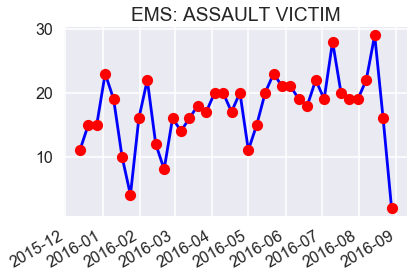

<Figure size 1080x504 with 0 Axes>

In [63]:
#Red dot with line
fig,ax = plt.subplots()

#Getting rid of spines in the graph's axis for aesthetic visualization  
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.plot_date(x=pt['timeStamp'],y=pt['EMS: ASSAULT VICTIM'],fmt='b')
ax.plot_date(x=pt['timeStamp'],y=pt['EMS: ASSAULT VICTIM'],fmt='ro')

#Setting title and making things look better
ax.set_title('EMS: ASSAULT VICTIM')
plt.tight_layout()
plt.figure(figsize=(15,7))

#Data labels overlap, so it will be rotated for looks
fig.autofmt_xdate()
plt.show()

### Visualization of 911-Calls by Town

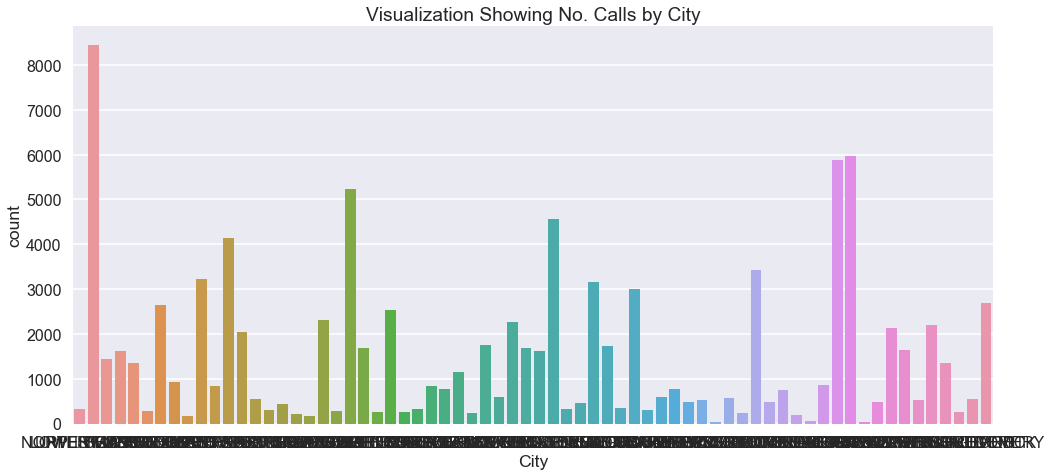

In [61]:
import numpy as np

all_ = np.zeros(df["timeStamp"].values.size,dtype=object)
city = []
d = set()

for i in range(all_.size):
    city.append(df['twp'].values[i])
    d.add(city[i])

d.discard(np.nan)
        
#Plotting schematics
plt.figure(figsize=(15,7))
plt.xlabel("City")
plt.title("Visualization Showing No. Calls by City")
sns.countplot(city,order = d) #alphabet order
plt.tight_layout()
plt.show()

## Percent Change 
Computing and comparing the percentage change in a time series of elements using the **_pct_change()_** function. 

In [46]:
pt['EMS: ASSAULT VICTIM pc']= pt['EMS: ASSAULT VICTIM'].pct_change(periods=1)

In [47]:
pt[['timeStamp','EMS: ASSAULT VICTIM pc','EMS: ASSAULT VICTIM']].head(10)

,timeStamp,EMS: ASSAULT VICTIM pc,EMS: ASSAULT VICTIM
,,,sum
0,2015-12-13,NaN,11.0
1,2015-12-20,0.363636,15.0
2,2015-12-27,0.000000,15.0
3,2016-01-03,0.533333,23.0
4,2016-01-10,-0.173913,19.0
5,2016-01-17,-0.473684,10.0
6,2016-01-24,-0.600000,4.0
7,2016-01-31,3.000000,16.0
8,2016-02-07,0.375000,22.0
